# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [27]:
 # Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

You will require the following libraries:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


The functions below will download the dataset into your browser:


Use the Pandas method <b>read_csv()</b> to load the data from the web address.


In [3]:
file_name = 'D:/Project/Python/kc_house_data_NaN.csv'

In [4]:
df = pd.read_csv(file_name)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.shape

(21613, 22)

### The data types of each column

In [7]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [8]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling


In [9]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d') # change dat column data type object->datetime64
df.dtypes

Unnamed: 0                int64
id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Drop the column <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data.

In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Identify columns with Null values from data

In [13]:
df.isna().sum()

id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [14]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [15]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [16]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [17]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method     <code>.to_frame()</code> to convert it to a dataframe.


In [18]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [19]:
df['bedrooms'].value_counts().to_frame()

,bedrooms
3.00000,9824
4.00000,6882
2.00000,2760
5.00000,1601
6.00000,272
1.00000,199
7.00000,38
3.37287,13
8.00000,13
9.00000,6


In [20]:
df[df.bedrooms > 10] #chcking for outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,2014-08-21,520000.0,11.0,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,2014-06-25,640000.0,33.0,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [21]:
df[df['bedrooms'] == 33]['sqft_lot']  #checking for outliers

15870    6000
Name: sqft_lot, dtype: int64

### Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


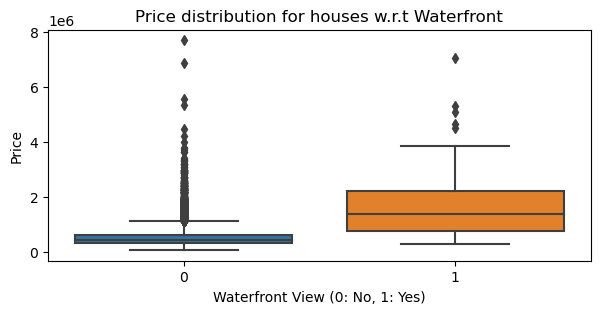

In [48]:
plt.figure(figsize=(7,3))
sns.boxplot(x='waterfront',y='price', data=df)
plt.xlabel('Waterfront View (0: No, 1: Yes)')
plt.ylabel('Price')
plt.title('Price distribution for houses w.r.t Waterfront')
plt.show()

### <b>Format</b> <code>Y-axis</code>

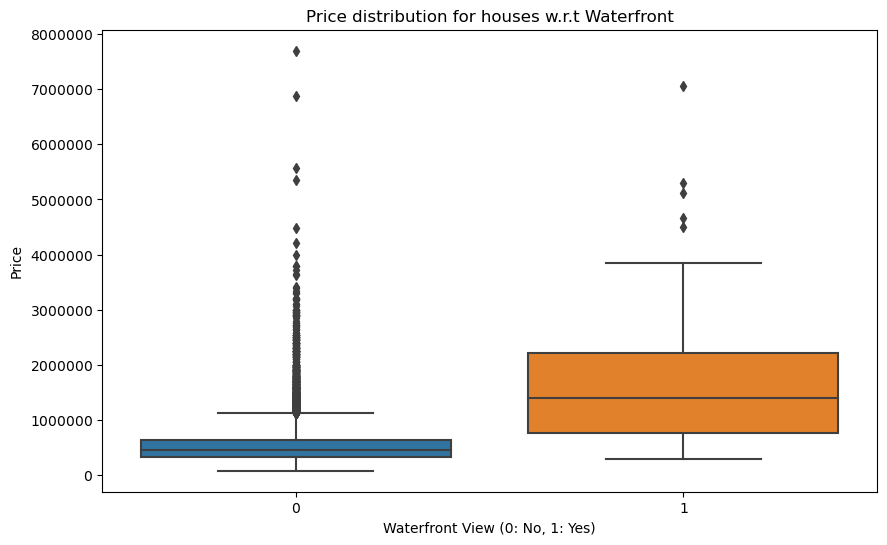

In [23]:
from matplotlib.ticker import ScalarFormatter

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)

# Format the y-axis labels
plt.yscale('linear')  # Ensure a linear scale
y_formatter = ScalarFormatter(useMathText=True)
y_formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(y_formatter)

plt.xlabel('Waterfront View (0: No, 1: Yes)')
plt.ylabel('Price')
plt.title('Price distribution for houses w.r.t Waterfront')
plt.show()

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


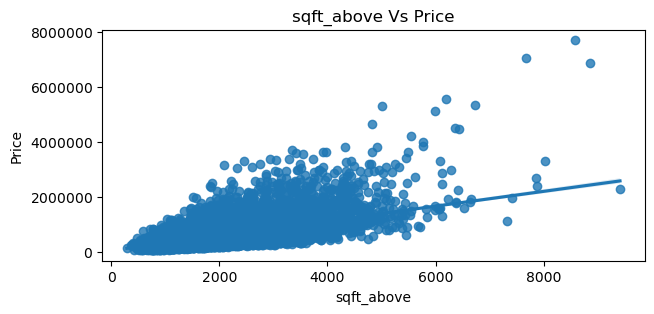

In [54]:
plt.figure(figsize=(7, 3))
sns.regplot(x='sqft_above', y='price', data=df)
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.title('sqft_above Vs Price')
plt.show()

# Coorelation
<br>
We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [28]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
date            -0.004357
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# R^2 
<br>
Calculate <code>R-Squared</code>  to find the feature other than price that help to predict the Price.


In [29]:
# Assuming 'price' is the dependent variable

# Get the list of independent variables
independent_vars = df.columns.difference(['price'])
independent_vars
# DataFrame to store R-squared values for each variable
r_squared_df = pd.DataFrame(columns=['Variable', 'R-squared'])

# Iterate over each variable and calculate R-squared
for var in independent_vars:
    # Ensure the variable is of numeric type (float or int)
    df[var] = pd.to_numeric(df[var], errors='coerce')
    
    X = df[[var]]
    y = df['price']
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Calculate R-squared
    r_squared = model.score(X, y)
    
#     Store R-squared value for the variable
    r_squared_df = r_squared_df.append({'Variable': var, 'R-squared': r_squared}, ignore_index=True)
    
# # Display R-squared values for each variable
r_squared_df_sorted = r_squared_df.sort_values(by='R-squared', ascending=False)
print(r_squared_df_sorted)

         Variable  R-squared
11    sqft_living   0.492853
5           grade   0.445468
9      sqft_above   0.366712
12  sqft_living15   0.342668
0       bathrooms   0.276400
15           view   0.157842
10  sqft_basement   0.104857
1        bedrooms   0.095355
7             lat   0.094251
16     waterfront   0.070953
4          floors   0.065943
18   yr_renovated   0.015986
13       sqft_lot   0.008039
14     sqft_lot15   0.006798
17       yr_built   0.002917
19        zipcode   0.002831
2       condition   0.001322
8            long   0.000468
6              id   0.000281
3            date   0.000019



# Module 4: Model Development

In [30]:
X1= df[['grade','sqft_living','waterfront','view','bedrooms','sqft_above','bathrooms','yr_renovated','lat','condition']]
# features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    

Y1= df[['price']]
Lr = LinearRegression()
Lr.fit(X1,Y1)
r_squared = Lr.score(X1, Y1)
r_squared

0.670731793029034

# Calculating best Alpha value for regression based on data

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

alphas = np.logspace(-4, 4, 9)  # This will create alpha values from 0.0001 to 10000

ridge_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X1, Y1, cv=5, scoring='r2')  # Using 5-fold cross-validation
    ridge_scores.append(np.mean(scores))

optimal_alpha = alphas[np.argmax(ridge_scores)]
print("Optimal Alpha:", optimal_alpha)

Optimal Alpha: 1.0


In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 4, 9)  # This will create alpha values from 0.0001 to 10000

param_grid = {'alpha': alphas}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X1, Y1)

best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)


Best Alpha: 1.0


# Calculating R^2 value for different Regression Model on entire data 

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X1)  # Transform your X data into polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_poly, Y1)
r_squared_poly = poly_reg.score(X_poly, Y1)

# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can tune the alpha value for regularization
lasso.fit(X1, Y1)
r_squared_lasso = lasso.score(X1, Y1)

# ElasticNet Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can tune the alpha and l1_ratio values
elastic_net.fit(X1, Y1)
r_squared_elastic_net = elastic_net.score(X1, Y1)

# Decision Tree Regression
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X1, Y1)
r_squared_decision_tree = decision_tree.score(X1, Y1)

# Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100)  # You can tune the number of estimators
random_forest.fit(X1, Y1)
r_squared_random_forest = random_forest.score(X1, Y1)

# Support Vector Regression
svr = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'poly', 'rbf'
svr.fit(X1, Y1)
r_squared_svr = svr.score(X1, Y1)

# Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)  # You can tune the hyperparameters
gradient_boosting.fit(X1, Y1)
r_squared_gradient_boosting = gradient_boosting.score(X1, Y1)

# Print R-squared values for each model
print('R-squared for Polynomial Regression:', r_squared_poly)
print('R-squared for Lasso Regression:', r_squared_lasso)
print('R-squared for ElasticNet Regression:', r_squared_elastic_net)
print('R-squared for Decision Tree Regression:', r_squared_decision_tree)
print('R-squared for Random Forest Regression:', r_squared_random_forest)
print('R-squared for Support Vector Regression:', r_squared_svr)
print('R-squared for Gradient Boosting Regression:', r_squared_gradient_boosting)


R-squared for Polynomial Regression: 0.7672716235856196
R-squared for Lasso Regression: 0.6707317914724651
R-squared for ElasticNet Regression: 0.580212491249941
R-squared for Decision Tree Regression: 0.9991148275479157
R-squared for Random Forest Regression: 0.9732397000601906
R-squared for Support Vector Regression: 0.4742985216208425
R-squared for Gradient Boosting Regression: 0.8518810790509628


From above R^2 value for couple of regression model is >97%. So, there is a chance of overfitting. Let's split the data and evalute the model 

# Module 5: Model Evaluation and Refinement

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.1, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.4f}, R-squared: {r_squared:.4f}')


Linear Regression - Mean Squared Error: 49290630209.1671, R-squared: 0.6616
Lasso - Mean Squared Error: 49290933623.6144, R-squared: 0.6616
Ridge - Mean Squared Error: 49296840144.8782, R-squared: 0.6616
ElasticNet - Mean Squared Error: 63816337270.8848, R-squared: 0.5619
Decision Tree - Mean Squared Error: 48929168026.2545, R-squared: 0.6641
Random Forest - Mean Squared Error: 26823732524.3729, R-squared: 0.8159
Gradient Boosting - Mean Squared Error: 26392718777.0981, R-squared: 0.8188
SVR - Mean Squared Error: 154852579162.7926, R-squared: -0.0630


In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Step 1: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Step 2: Cross-Validation (K-Fold)
model = GradientBoostingRegressor()  # Step 3: Model Selection
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores  # Convert negative MSE scores to positive

# Step 4: Model Evaluation
avg_mse = mse_scores.mean()
avg_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

print(f'Average MSE (Cross-Validation): {avg_mse}')
print(f'Average R-squared (Cross-Validation): {avg_r2}')

# Step 5: Hyperparameter Tuning (if needed)
# In this simple example, we don't need hyperparameter tuning.

# Step 6: Final Model Training
model.fit(X_train, y_train)

# Step 7: Prediction on Unseen Data (Test Set)
y_pred = model.predict(X_test)

# Model Evaluation on Test Set
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Test Set): {test_mse}')
print(f'R-squared (Test Set): {test_r2}')

Yhat_df = pd.DataFrame({'Predicted_Y': y_pred}) # Yhat converted to dataframe from numpy.ndarray
merged_df = pd.concat([Yhat_df, Y1], axis=1)
print(merged_df.head())


Average MSE (Cross-Validation): 23547104411.38543
Average R-squared (Cross-Validation): 0.8187851874637466
Mean Squared Error (Test Set): 30966330818.590614
R-squared (Test Set): 0.7951646761177257
    Predicted_Y     price
0  3.904517e+05  221900.0
1  8.931455e+05  538000.0
2  1.215472e+06  180000.0
3  1.660835e+06  604000.0
4  7.855199e+05  510000.0


In [37]:
specific_record = merged_df.iloc[2100]

print(specific_record)

Predicted_Y    416115.399889
price          491000.000000
Name: 2100, dtype: float64


In [38]:
# Step 1: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Step 2: Cross-Validation (K-Fold)
model = RandomForestRegressor()  # Step 3: Model Selection
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores  # Convert negative MSE scores to positive

# Step 4: Model Evaluation
avg_mse = mse_scores.mean()
avg_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

print(f'Average MSE (Cross-Validation): {avg_mse}')
print(f'Average R-squared (Cross-Validation): {avg_r2}')

# Step 5: Hyperparameter Tuning (if needed)
# In this simple example, we don't need hyperparameter tuning.

# Step 6: Final Model Training
model.fit(X_train, y_train)

# Step 7: Prediction on Unseen Data (Test Set)
y_pred = model.predict(X_test)

# Model Evaluation on Test Set
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Test Set): {test_mse}')
print(f'R-squared (Test Set): {test_r2}')

Yhat_df = pd.DataFrame({'Predicted_Y': y_pred}) # Yhat converted to dataframe from numpy.ndarray
merged_df = pd.concat([Yhat_df, Y1], axis=1)
print(merged_df.head())


Average MSE (Cross-Validation): 24194702634.576576
Average R-squared (Cross-Validation): 0.8147233314967753
Mean Squared Error (Test Set): 32455557311.470203
R-squared (Test Set): 0.7853137773208969
   Predicted_Y     price
0    376034.00  221900.0
1    866419.00  538000.0
2   1074457.65  180000.0
3   1590949.50  604000.0
4    850905.00  510000.0


# Conclusion

After considering the results for <code>GradientBoostingRegressor</code> and <code>RandomForestRegressor</code>, we are moving forward with GradientBoostingRegressor because its R^2 value for train and test data is much closer than RandomForestRegressor's R^2 value.

#### I achieved <code>81.90%</code> on train data and <code>79.39%</code> on test data.

Average MSE (Cross-Validation): 23547104411.38543</br>
Average R-squared (Cross-Validation): <FONT COLOR="#ff0000">0.8187851874637466</FONT> (Train data: 81.87%)</br>
Mean Squared Error (Test Set): 30966330818.590614</br>
R-squared (Test Set): <FONT COLOR="#ff0000">0.7951646761177257</FONT> (Test data: 79.51%)</br>